#### matplotlib 提供了一个非常有用的注解工具annotations，可以在数据图形上添加文本注解 ，注解通常用于解释数据的内容

In [113]:
%matplotlib inline

In [114]:
import matplotlib.pyplot as plt

#### 使用文本注解绘制树节点

In [115]:
#创建字典的另一种方法，字典的内置函数dict（）创建
#决策点的属性， boxstyle为文本框的类型，sawtooth是锯齿形，fc是文本框内的颜色  
decisionNode = dict(boxstyle = "sawtooth", fc = "0.8")

In [116]:
leafNode = dict(boxstyle = "round4", fc =  "0.8")#叶子节点的属性

In [117]:
arrow_args = dict(arrowstyle = "<-")#箭头的属性

In [118]:
def plotNode(nodeTxt, centerPt, parentPt, nodeType):
#nodeTxt为要显示的文本，xy：被注释点的位置（在完整的树结构图中为指向文本的点，也即参数parentPt），
#xytext：注释文本的位置坐标（在后续完整的树结构图中为文本的中心点，也即箭头所在的点centerPt）， nodeType为前面定义的决策点或叶子节点
#xycoords 和 textcoords 是字符串，指示 xy 和 xytext 的坐标关系(坐标xy与xytext的说明)：若textcoords=None，则
#默认textcoords与xycoords相同，若都未设置，默认为data
#va/ha设置节点框中文字的位置，va为纵向取值为(u'top', u'bottom', u'center', u'baseline')，ha为横向取值为(u'center', u'right', u'left'
    createPlot.ax1.annotate(nodeTxt, xy = parentPt, xycoords = 'axes fraction', xytext = centerPt, textcoords = 'axes fraction',\
                           va = "center", ha = "center", bbox = nodeType, arrowprops = arrow_args)

In [119]:
def createPlot():
    #创建一个画布，背景为白色
    fig = plt.figure(1, facecolor = 'white')
    #画布清空
    fig.clf()
    #ax1是函数createPlot的一个属性，这个可以在函数里面定义也可以在函数定义后加入也可以
    #frameon表示是否绘制坐标轴矩形    
    createPlot.ax1 = plt.subplot(111, frameon = False)
    plotNode('a decision node', (0.5, 0.1), (0.1, 0.5), decisionNode)
    plotNode('a leaf node',(0.8, 0.1), (0.3, 0.8), leafNode)
    plt.show()

#### 获取叶节点的数目和树的层数 （在该例中如果键值是类标签（yes或no），则该节点是叶子节点；若值是另一个字典，则该节点是判断节点）

In [120]:
#叶节点的数目
def getNumLeafs(myTree):
    #定义叶子节点数目变量
    numLeafs = 0
    #获得myTree的第一个键，即第一个特征
    firstStr = myTree.keys()[0]
    # 根据键得到对应的键值，即根据第一个特征分类的结果 
    secondDict = myTree[firstStr]
    #遍历secondDict字典的键
    for key in secondDict.keys():
        #若相应的键的键值又为一个字典，即判断节点，则进行递归，直到为叶子节点
        if type(secondDict[key]).__name__=='dict':
            numLeafs += getNumLeafs(secondDict[key])
        #若相应的键的键值不是字典，是类标签，则为叶子节点，numLeafs加1
        else:   numLeafs +=1
    #返回叶子节点的数目
    return numLeafs

In [121]:
#获取树的层数(计算遍历过程中遇到判断节点的个数，即层数)
def getTreeDepth(myTree):
    #定义关于树的层数的变量
    maxDepth = 0
    #获得myTree的第一个键，即第一个特征
    firstStr = myTree.keys()[0]
     # 根据键得到对应的键值，即根据第一个特征分类的结果 
    secondDict = myTree[firstStr]
   # print secondDict
    #遍历secondDict字典的键
    for key in secondDict.keys():
        #print key
        #若相应的键的键值又为一个字典，即判断节点，则进行递归，直到为叶子节点终止，一旦到达叶子节点，
        #则从递归调用中返回，并将计算树的深度加1
        if type(secondDict[key]).__name__=='dict':
            thisDepth = 1 + getTreeDepth(secondDict[key])
        #若为叶子节点，则当前树的深度设为1
        else:   thisDepth = 1
        # 如果当前树的深度大于数最大深度  
        if thisDepth > maxDepth: maxDepth = thisDepth
    #返回树的最大深度
    return maxDepth

In [122]:
def plotMidText(cntrPt, parentPt, txtString):
    xMid = (parentPt[0]-cntrPt[0])/2.0 + cntrPt[0]
    yMid = (parentPt[1]-cntrPt[1])/2.0 + cntrPt[1]
    createPlot.ax1.text(xMid, yMid, txtString, va="center", ha="center", rotation=30)


#### 变量plotTree.totalW存储树的宽度，plotTree.totalD存储树的深度（用这两个变量计算树节点的摆放位置，这样可以将树绘制在水平方向和垂直方向的中心位置）；

#### plotTree.xoff和plotTree.yoff追踪已经绘制的节点位置，以及放置下一个节点的恰当位置

### 树的宽度用于极端放置判断节点的位置，主要的计算原则是将它放在所有叶子节点的中间，而不仅仅是它的子节点的中间。

### 通过计算树包含的所有叶子节点数，划分图形的宽度，从而计算得到当前节点的中心位置，也就是说，我们按照叶子节点的数目将X轴化分为若干部分 

In [123]:
def plotTree(myTree, parentPt, nodeTxt):
    #计算树叶子节点（宽度）
    numLeafs = getNumLeafs(myTree) 
    #计算树的判断节点（高度）
    depth = getTreeDepth(myTree)
    #获得myTree的第一个键，即第一个特征
    firstStr = myTree.keys()[0] 
    #其中，变量plotTree.xOff即为最近绘制的一个叶子节点的x轴坐标，
    #在确定当前节点位置时每次只需确定当前节点有几个叶子节点，因此其叶子节点所占的
    #总距离就确定了即为： float(numLeafs)/plotTree.totalW，因此当前节点的位置即为其所有叶子节点
    #所占距离的中间即一半为： float(numLeafs)/2.0/plotTree.totalW，但是由于开始plotTree.xOff赋值
    #并非从0开始，而是左移了半个表格，因此还需加上半个表格距离即为： 1/2/plotTree.totalW，
    #则加起来便为： (1.0 + float(numLeafs))/2.0/plotTree.totalW，因此偏移量确定，则x轴的位置变为： 
    # plotTree.xOff + (1.0 + float(numLeafs))/2.0/plotTree.totalW
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs))/2.0/plotTree.totalW, plotTree.yOff)
    print cntrPt
    #
    plotMidText(cntrPt, parentPt, nodeTxt)
    plotNode(firstStr, cntrPt, parentPt, decisionNode)
    secondDict = myTree[firstStr]
    plotTree.yOff = plotTree.yOff - 1.0/plotTree.totalD
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':  
            plotTree(secondDict[key],cntrPt,str(key))        
        else:
            plotTree.xOff = plotTree.xOff + 1.0/plotTree.totalW
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
    plotTree.yOff = plotTree.yOff + 1.0/plotTree.totalD

In [124]:
def createPlot(inTree):
    #定义一块画布(画布是自己的理解) ，背景为白色
    fig = plt.figure(1, facecolor='white')
    # 清空画布 
    fig.clf()
    #xticks和yticks: 为x,y轴的主刻度和次刻度设置颜色、大小、方向，以及标签大小。定义横纵坐标轴，无内容  
    axprops = dict(xticks=[], yticks=[])
    #绘制图像，无边框，无坐标轴 
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)  
    #存储树的宽度（所有叶子节点）
    plotTree.totalW = float(getNumLeafs(inTree))
    #存储树的深度（判断节点的数目）
    plotTree.totalD = float(getTreeDepth(inTree))
    ## 决策树起始横坐标  1/plotTree.totalW是按照叶子节点的数目将x轴划分为若干个部分的每一部分的长度，
    #乘以-0.5即意为x开始位置为第一个表格左边的半个表格距离位置
    plotTree.xOff = -0.5/plotTree.totalW;
    # 决策树的起始纵坐标
    plotTree.yOff = 1.0;
    # 绘制决策树 
    plotTree(inTree, (0.5,1.0), '')
    #显示
    plt.show()

#### 该函数主要用于测试，输出预先存储的树信息，避免每次测试代码时都要从数据中创建树的麻烦

In [125]:
def retrieveTree(i):
    listOfTrees =[{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}},
                  {'no surfacing': {0: 'no', 1: {'flippers': {0: {'head': {0: 'no', 1: 'yes'}}, 1: 'no'}}}}
                  ]
    return listOfTrees[i]


In [126]:
retrieveTree(0)

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

(0.5, 1.0)
(0.625, 0.6666666666666667)
(0.5, 0.3333333333333334)


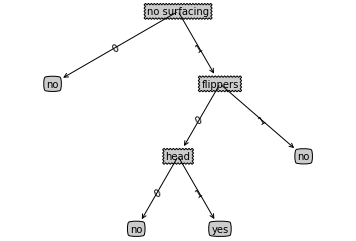

In [127]:
createPlot(myTree)